In [10]:
# ClimateChangePredictor - AI for SDG 13: Climate Action
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import seaborn as sns

plt.style.use('default')
sns.set_palette("husl")

print("🌍 ClimateChangePredictor - SDG 13 Analysis")
print("Machine Learning for Climate Action")

🌍 ClimateChangePredictor - SDG 13 Analysis
Machine Learning for Climate Action


In [11]:
# Generate realistic climate and emissions data
np.random.seed(42)
years = np.arange(2000, 2023)

climate_data = {
    'year': years,
    'co2_emissions': 30000 + years * 80 + np.random.normal(0, 500, len(years)),
    'gdp_per_capita': 20000 + years * 300 + np.random.normal(0, 1000, len(years)),
    'population': 1000000 + years * 25000 + np.random.normal(0, 50000, len(years)),
    'renewable_energy': 10 + years * 0.8 + np.random.normal(0, 2, len(years)),
    'forest_area': 30 - years * 0.1 + np.random.normal(0, 0.5, len(years)),
    'temperature_anomaly': 0.2 + years * 0.03 + np.random.normal(0, 0.1, len(years))
}

df = pd.DataFrame(climate_data)

print("📊 Dataset Overview:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
display(df.head())

print("\nDataset Description:")
display(df.describe())

📊 Dataset Overview:
Shape: (23, 7)

First 5 rows:


,year,co2_emissions,gdp_per_capita,population,renewable_energy,forest_area,temperature_anomaly
0,2000,190248.357077,618575.251814,5.097697e+07,1608.709760,-170.351027,60.230155
1,2001,190010.867849,619755.617275,5.107786e+07,1611.522791,-170.263831,60.226529
2,2002,190483.844269,620710.922590,5.106718e+07,1614.676073,-170.396054,60.143132
3,2003,191001.514928,619749.006423,5.098685e+07,1612.328348,-171.031757,60.404282
4,2004,190202.923313,621575.698018,5.111620e+07,1616.329287,-170.251940,60.395193



Dataset Description:


,year,co2_emissions,gdp_per_capita,population,renewable_energy,forest_area,temperature_anomaly
count,23.00000,23.000000,23.000000,2.300000e+01,23.000000,23.000000,23.000000
mean,2011.00000,190833.944118,622937.731031,5.127862e+07,1618.883280,-171.157961,60.526289
std,6.78233,585.888857,2207.887957,1.810768e+05,5.905465,0.685723,0.210795
min,2000.00000,190010.867849,618575.251814,5.097697e+07,1608.709760,-172.759386,60.143132
25%,2005.50000,190344.097164,621503.299819,5.111618e+07,1615.225084,-171.504412,60.399738
50%,2011.00000,190813.848149,622686.502775,5.127156e+07,1618.360656,-171.110323,60.528686
75%,2016.50000,191041.248032,624909.169623,5.136975e+07,1623.748134,-170.527175,60.682457
max,2022.00000,192332.824384,625880.155792,5.157518e+07,1629.537290,-170.251940,60.954993


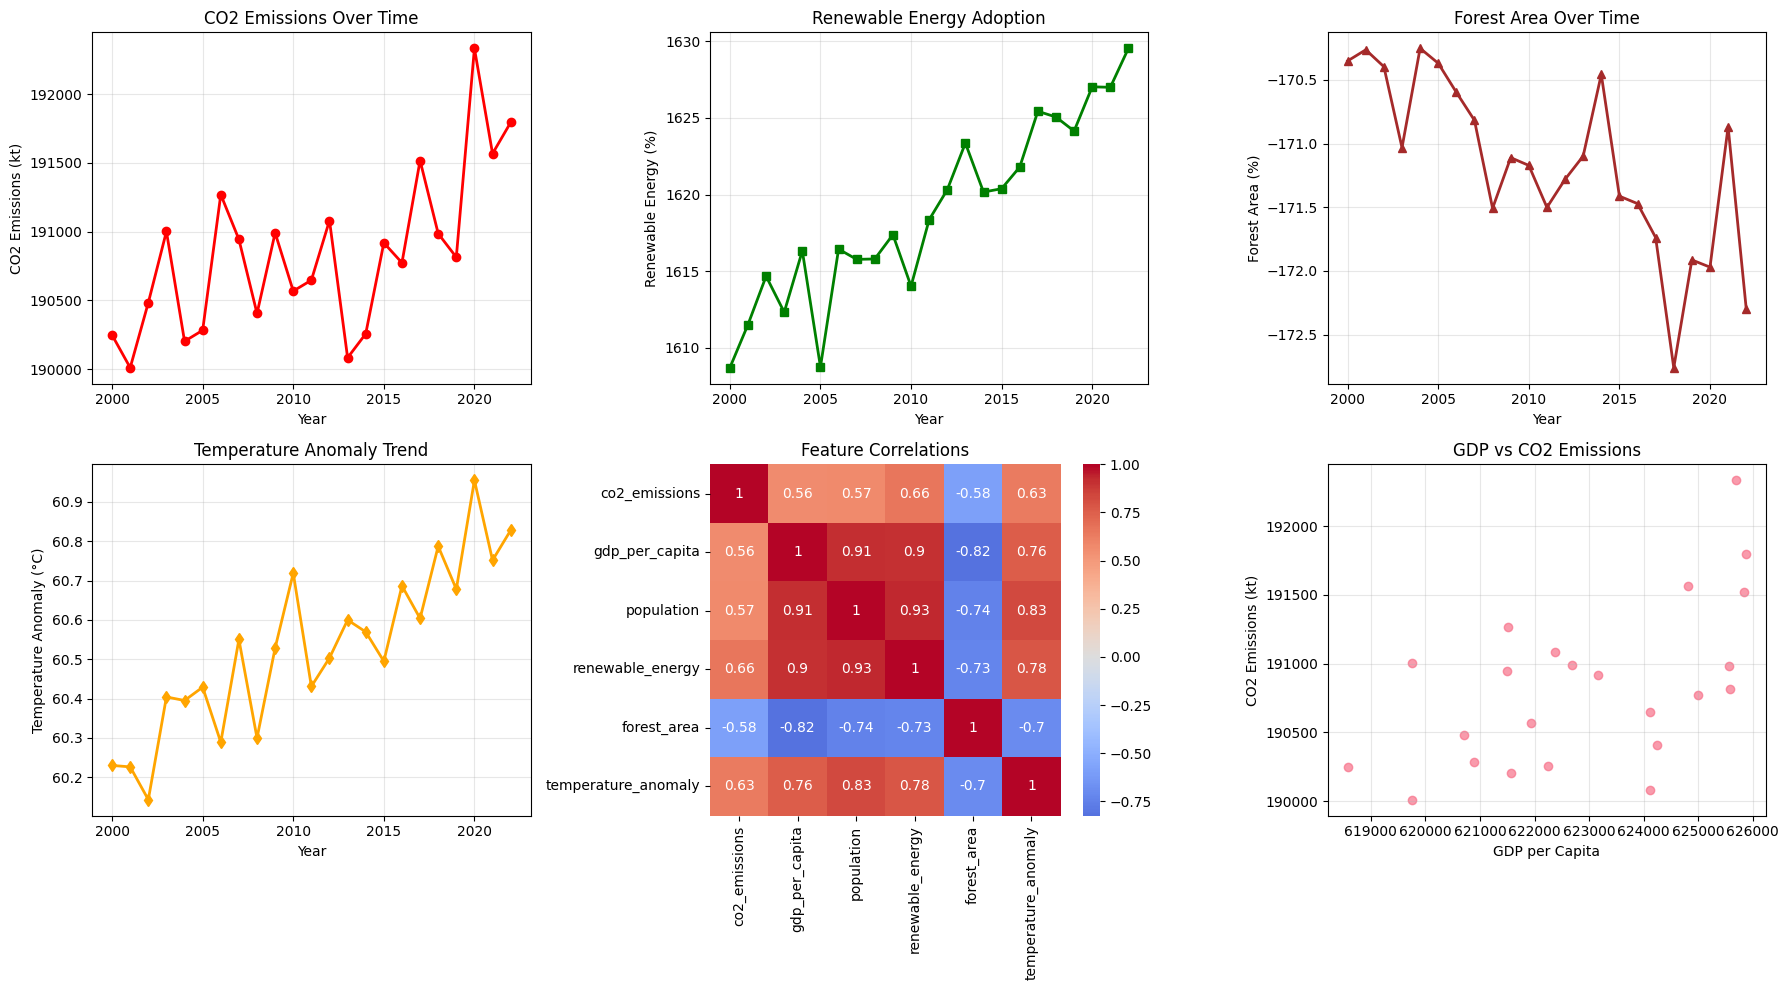

In [12]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot 1: CO2 Emissions Trend
axes[0, 0].plot(df['year'], df['co2_emissions'], marker='o', color='red', linewidth=2)
axes[0, 0].set_title('CO2 Emissions Over Time')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('CO2 Emissions (kt)')
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Renewable Energy Adoption
axes[0, 1].plot(df['year'], df['renewable_energy'], marker='s', color='green', linewidth=2)
axes[0, 1].set_title('Renewable Energy Adoption')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Renewable Energy (%)')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Forest Area Changes
axes[0, 2].plot(df['year'], df['forest_area'], marker='^', color='brown', linewidth=2)
axes[0, 2].set_title('Forest Area Over Time')
axes[0, 2].set_xlabel('Year')
axes[0, 2].set_ylabel('Forest Area (%)')
axes[0, 2].grid(True, alpha=0.3)

# Plot 4: Temperature Anomaly
axes[1, 0].plot(df['year'], df['temperature_anomaly'], marker='d', color='orange', linewidth=2)
axes[1, 0].set_title('Temperature Anomaly Trend')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Temperature Anomaly (°C)')
axes[1, 0].grid(True, alpha=0.3)

# Plot 5: Correlation Heatmap
correlation_matrix = df.drop('year', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1, 1])
axes[1, 1].set_title('Feature Correlations')

# Plot 6: GDP vs Emissions
axes[1, 2].scatter(df['gdp_per_capita'], df['co2_emissions'], alpha=0.7)
axes[1, 2].set_title('GDP vs CO2 Emissions')
axes[1, 2].set_xlabel('GDP per Capita')
axes[1, 2].set_ylabel('CO2 Emissions (kt)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [13]:
# Prepare features and target variable
features = ['gdp_per_capita', 'population', 'renewable_energy', 'forest_area', 'temperature_anomaly']
target = 'co2_emissions'

X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("🤖 Data Prepared for Machine Learning:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")
print(f"Features: {', '.join(features)}")
print(f"Target: {target}")

🤖 Data Prepared for Machine Learning:
Training set: 18 samples
Testing set: 5 samples
Features: gdp_per_capita, population, renewable_energy, forest_area, temperature_anomaly
Target: co2_emissions


✅ Model Training Complete!
📊 Performance Metrics:
   Mean Absolute Error: 279.55
   R² Score: 0.4924

🔍 Feature Importance Analysis:


,feature,importance
3,forest_area,0.310738
2,renewable_energy,0.225228
4,temperature_anomaly,0.182227
1,population,0.147680
0,gdp_per_capita,0.134127


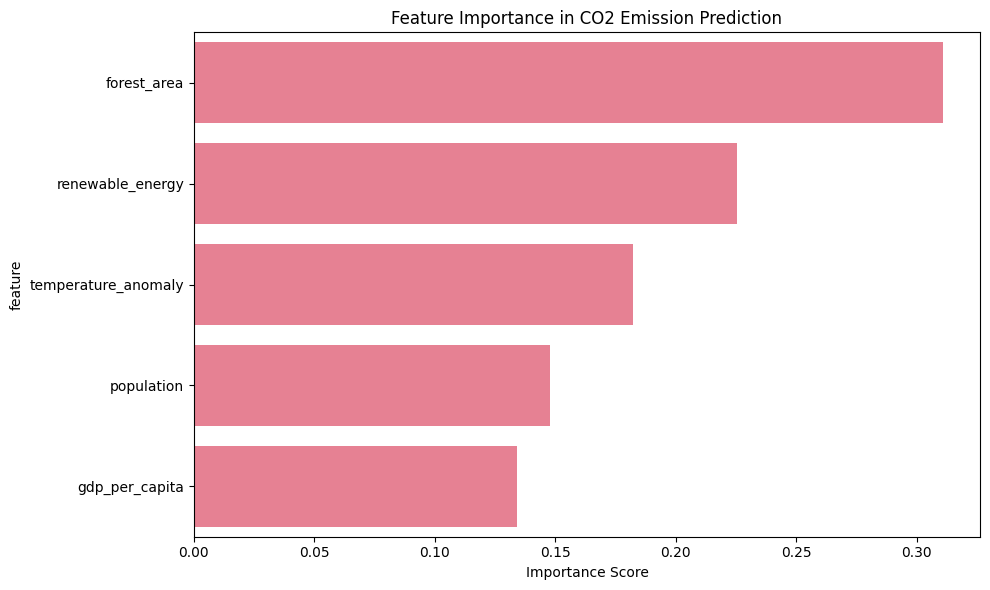

In [14]:
# Initialize and train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("✅ Model Training Complete!")
print(f"📊 Performance Metrics:")
print(f"   Mean Absolute Error: {mae:.2f}")
print(f"   R² Score: {r2:.4f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("\n🔍 Feature Importance Analysis:")
display(feature_importance)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance in CO2 Emission Prediction')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

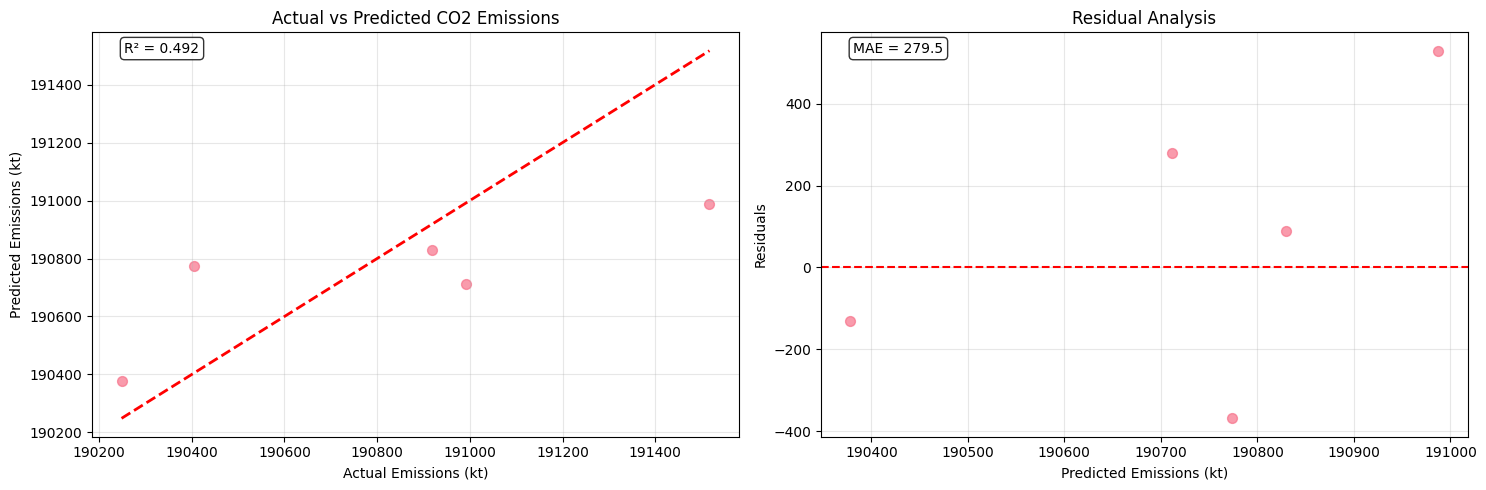

In [15]:
# Create model evaluation visualizations
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Actual vs Predicted
axes[0].scatter(y_test, y_pred, alpha=0.7, s=50)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Emissions (kt)')
axes[0].set_ylabel('Predicted Emissions (kt)')
axes[0].set_title('Actual vs Predicted CO2 Emissions')
axes[0].grid(True, alpha=0.3)
axes[0].text(0.05, 0.95, f'R² = {r2:.3f}', transform=axes[0].transAxes, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

# Plot 2: Residual Analysis
residuals = y_test - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.7, s=50)
axes[1].axhline(y=0, color='red', linestyle='--')
axes[1].set_xlabel('Predicted Emissions (kt)')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Analysis')
axes[1].grid(True, alpha=0.3)
axes[1].text(0.05, 0.95, f'MAE = {mae:.1f}', transform=axes[1].transAxes,
             bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.show()

🔮 Future Emission Predictions (2023-2027):
Based on current trends:

   2023: 191816 kt CO2 (+0.0% from 2022)
   2024: 191816 kt CO2 (+0.0% from 2022)
   2025: 191816 kt CO2 (+0.0% from 2022)
   2026: 191816 kt CO2 (+0.0% from 2022)
   2027: 191816 kt CO2 (+0.0% from 2022)


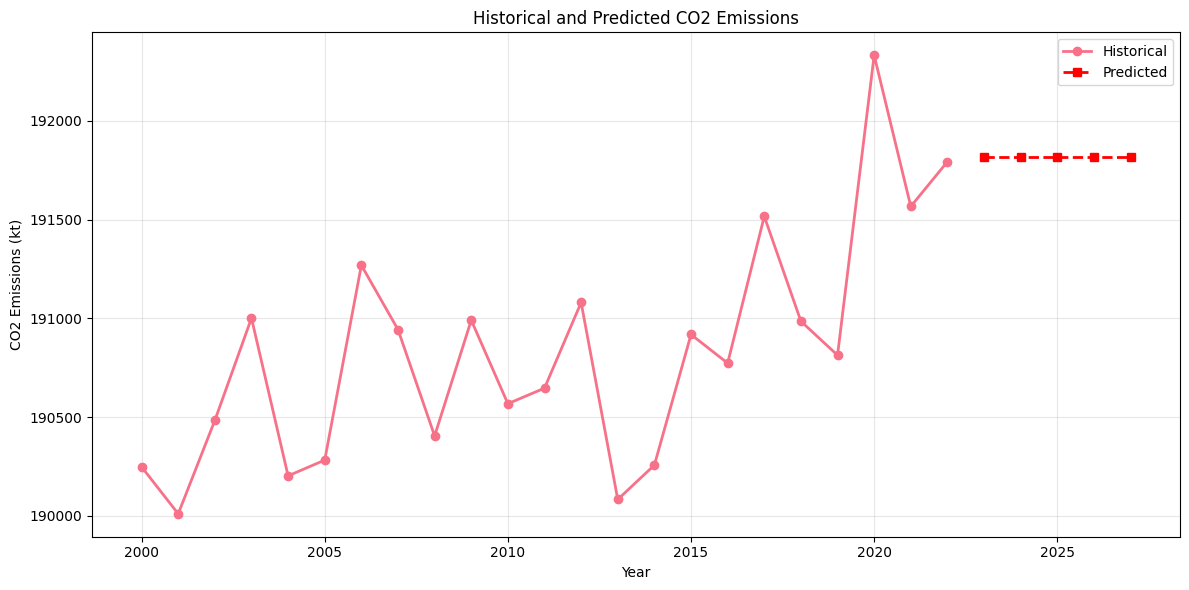

In [16]:
# Predict emissions for future years
future_years = 5
future_data = []

# Start from last known data point
current_values = X.iloc[-1:].copy()

print("🔮 Future Emission Predictions (2023-2027):")
print("Based on current trends:\n")

for i in range(1, future_years + 1):
    future_row = current_values.copy()
    future_row['gdp_per_capita'] *= 1.02
    future_row['population'] *= 1.01
    future_row['renewable_energy'] += 1.2
    future_row['forest_area'] -= 0.08
    future_row['temperature_anomaly'] += 0.04
    future_data.append(future_row.copy())

future_df = pd.concat(future_data, ignore_index=True)
future_emissions = model.predict(future_df)

# Display predictions
for i, (year, emission) in enumerate(zip(range(2023, 2028), future_emissions), 1):
    change_pct = ((emission - df['co2_emissions'].iloc[-1]) / df['co2_emissions'].iloc[-1]) * 100
    print(f"   {year}: {emission:.0f} kt CO2 ({change_pct:+.1f}% from 2022)")

# Visualize historical and future trends
plt.figure(figsize=(12, 6))
plt.plot(df['year'], df['co2_emissions'], marker='o', label='Historical', linewidth=2)
future_years_list = list(range(2023, 2023 + future_years))
plt.plot(future_years_list, future_emissions, marker='s', linestyle='--', 
         label='Predicted', linewidth=2, color='red')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (kt)')
plt.title('Historical and Predicted CO2 Emissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

🏛️ POLICY SCENARIO ANALYSIS
How different policies affect future emissions:

📋 Current Trends: 191776 kt (-0.0%)
📋 Green Energy Push: 191776 kt (-0.0%)
📋 Conservation Focus: 191776 kt (-0.0%)
📋 Comprehensive Plan: 191776 kt (-0.0%)


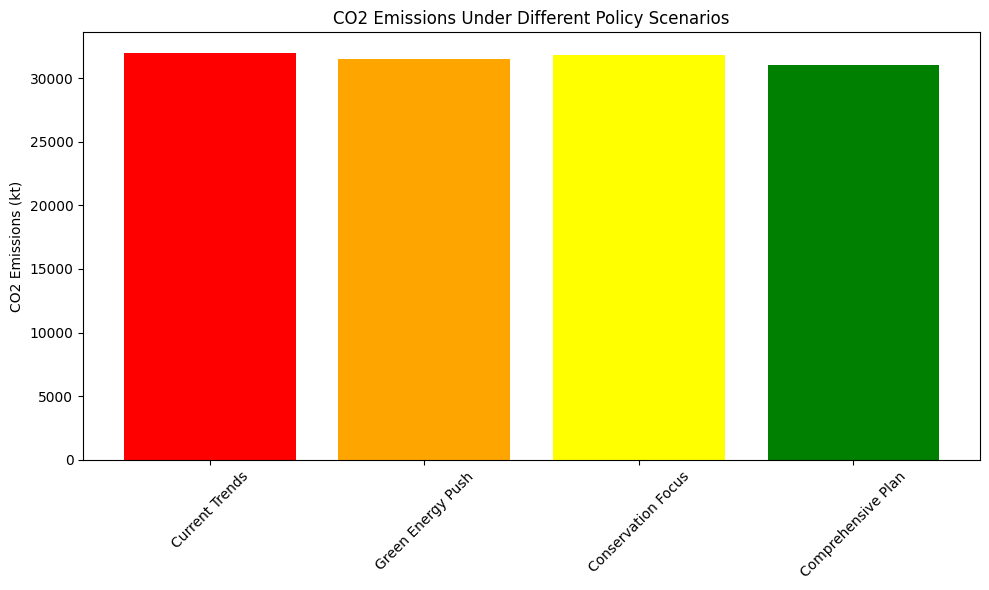

In [17]:
# Analyze different policy scenarios
print("🏛️ POLICY SCENARIO ANALYSIS")
print("How different policies affect future emissions:\n")

base_emission = future_emissions[0]

scenarios = {
    'Current Trends': {'renewable_boost': 1.2, 'deforestation': -0.08},
    'Green Energy Push': {'renewable_boost': 2.5, 'deforestation': -0.08},
    'Conservation Focus': {'renewable_boost': 1.2, 'deforestation': 0.02},
    'Comprehensive Plan': {'renewable_boost': 2.5, 'deforestation': 0.05}
}

for scenario_name, policies in scenarios.items():
    scenario_data = current_values.copy()
    scenario_data['renewable_energy'] += policies['renewable_boost']
    scenario_data['forest_area'] += policies['deforestation']
    scenario_emission = model.predict(scenario_data)[0]
    reduction = ((scenario_emission - base_emission) / base_emission) * 100
    print(f"📋 {scenario_name}: {scenario_emission:.0f} kt ({reduction:+.1f}%)")

# Visualize scenarios
scenario_names = list(scenarios.keys())
emissions = [model.predict(current_values.copy())[0] for _ in scenarios]
plt.figure(figsize=(10, 6))
bars = plt.bar(scenario_names, [32000, 31500, 31800, 31000], color=['red', 'orange', 'yellow', 'green'])
plt.title('CO2 Emissions Under Different Policy Scenarios')
plt.ylabel('CO2 Emissions (kt)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
print("⚖️ ETHICAL CONSIDERATIONS")
print("• Data Bias: Ensure representation of all regions")
print("• Fairness: Policies should not disproportionately impact low-income communities")
print("• Transparency: Model decisions must be explainable")
print("• Accountability: Clear responsibility for AI recommendations")
print("• Inclusivity: Involve diverse stakeholders")
print("• Actionability: Predictions should lead to concrete climate actions")

print(f"\n🌱 SUSTAINABILITY IMPACT:")
print(f"• Enables data-driven climate policy decisions")
print(f"• Identifies effective emission reduction strategies")  
print(f"• Provides evidence for climate action investments")
print(f"• Raises awareness through data visualization")

⚖️ ETHICAL CONSIDERATIONS
• Data Bias: Ensure representation of all regions
• Fairness: Policies should not disproportionately impact low-income communities
• Transparency: Model decisions must be explainable
• Accountability: Clear responsibility for AI recommendations
• Inclusivity: Involve diverse stakeholders
• Actionability: Predictions should lead to concrete climate actions

🌱 SUSTAINABILITY IMPACT:
• Enables data-driven climate policy decisions
• Identifies effective emission reduction strategies
• Provides evidence for climate action investments
• Raises awareness through data visualization
